In [14]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist
from matplotlib import pyplot as plt
%matplotlib inline

from google.colab import drive

drive.mount('/content/gdrive')
dir="/content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign5/"

!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


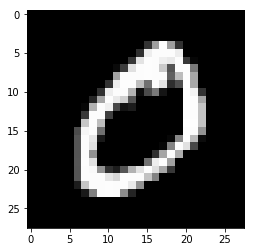

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print (x_train.shape)

plt.imshow(x_train[1], cmap='gray')

In [3]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

print(X_train.shape)
# Row 15 of second image
print(X_train[1,15,:,0])

(60000, 28, 28, 1)
[  0   0   0   0   0   0  76 246 252 112   0   0   0   0   0   0   0   0
   0   0 253 252 148   0   0   0   0   0]


In [4]:
print(y_train[1])
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Y_train[1]

0


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [5]:
# Entire dataset mean and standard deviation
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

# Create generator to normalize images
# feature-wise is per-dataset, sample-wise is per-image
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# Calculate mean, var on training dataset, required if featurewise_center/featurewise_std_normalization set to True
datagen.fit(X_train)
print('Train data generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

Statistics train=33.318 (78.567), test=33.791 (79.172)
Train data generator mean=33.318, std=78.567


In [6]:
batch_size = 128

# get batch of the training set
train_iterator = datagen.flow(X_train, Y_train, batch_size=batch_size)
batchX, batchy = train_iterator.next()

valid_iterator = datagen.flow(X_test, Y_test, batch_size=batch_size)

print('Batches train=%d, test=%d' % (len(train_iterator), len(valid_iterator)))

Batches train=469, test=79


In [9]:
print(batchX.shape)
print(batchX[1,15,:,0])

(128, 28, 28, 1)
[-0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
 -0.42407447 -0.42407447 -0.42407447  0.49233565  1.6123924   1.5742086
  0.50506353 -0.28406736 -0.42407447 -0.42407447 -0.25861153  2.783361
  2.0578694  -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
 -0.42407447 -0.42407447 -0.42407447 -0.42407447]


In [0]:
def build_model():
  model = Sequential()

  model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(28,28,1))) #26
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Conv2D(32, (3, 3))) #24
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Conv2D(10, (1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))#12

  model.add(Conv2D(16, (3, 3)))#10
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Conv2D(16, (3, 3)))#8
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Conv2D(16, (3, 3)))#6
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Conv2D(16, (3, 3)))#4
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Conv2D(10, (4, 4))) 

  model.add(Flatten())
  model.add(Activation('softmax'))
  
  return model 

In [0]:
init_lr = 0.003

def scheduler(epoch, lr):
  return round(init_lr * 1/(1 + 0.319 * epoch), 10)

new_lr = LearningRateScheduler(scheduler, verbose=1)

In [16]:
custom_model = build_model()
custom_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=init_lr), metrics=['accuracy'])

file = dir + "Assign5-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

custom_model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator),                     
                    validation_data=valid_iterator, validation_steps=len(valid_iterator),
                    epochs=30, verbose=1,
                    callbacks=[new_lr, checkpoint])

Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 15s 32ms/step - loss: 0.2231 - acc: 0.9309 - val_loss: 0.0766 - val_acc: 0.9767

Epoch 00001: val_acc improved from -inf to 0.97670, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign5/Assign5-01-0.9767.hdf5
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 12s 27ms/step - loss: 0.0598 - acc: 0.9808 - val_loss: 0.0356 - val_acc: 0.9884

Epoch 00002: val_acc improved from 0.97670 to 0.98840, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign5/Assign5-02-0.9884.hdf5
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 12s 27ms/step - loss: 0.0470 - acc: 0.9847 - val_loss: 0.0448 - val_acc: 0.9859

Epoch 00003: val_acc did not improve from 0.98840
Epoch 4/30

Epoch 00

In [17]:
custom_model = build_model()
custom_model.load_weights(dir + "Assign5-22-0.9950.hdf5")
print("Loaded model from disk ", custom_model.summary())

custom_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

score = custom_model.evaluate_generator(valid_iterator, steps=len(valid_iterator),verbose=0)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_15 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_16 (Activation)   (None, 24, 24, 32)        0         
__________

#### Get m misclassified images

In [0]:
pred_classes=[]
test_classes=[]

def get_incorrect_im(X_test, m):
  global pred_classes, test_classes
    
  Y_pred = custom_model.predict(X_test)
  pred_classes = np.argmax(Y_pred, axis=1)
  test_classes = np.argmax(Y_test, axis=1)

  incorrect_im = (test_classes != pred_classes) 
  
  incorrect_idx_list = [i for i, j in enumerate(incorrect_im) if j == True]
  idx_list = incorrect_idx_list[:m]
  return idx_list

25 [0, 5, 6, 17, 18, 34, 43, 51, 62, 67]
For first incorrect image :
Actual 7
Predicted 5


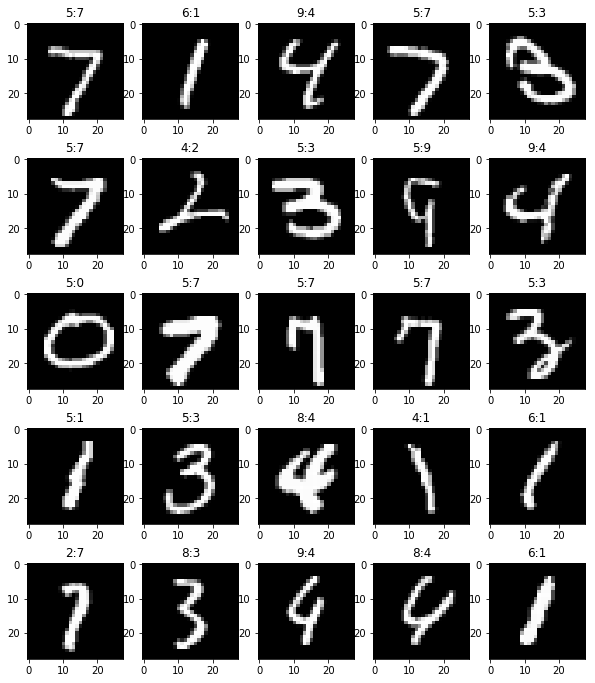

In [22]:
incorrect_idx_list = get_incorrect_im(X_test, 25)
print(len(incorrect_idx_list), incorrect_idx_list[:10])

fig = plt.figure(figsize=(10,12)) # width,height

first_incorrect_idx = incorrect_idx_list[0]
print("For first incorrect image :")
print("Actual", test_classes[first_incorrect_idx]) #, Y_test[first_incorrect_idx])
print("Predicted", pred_classes[first_incorrect_idx]) #, Y_pred[first_incorrect_idx])

for idx, val in enumerate(incorrect_idx_list):
  
  # Plot the original test image
  sub = fig.add_subplot(5, 5, idx+1) # nrows, ncols, index
  
  label = str(pred_classes[val]) + ":" + str(test_classes[val])
  sub.set_title(label)
  sub.imshow(x_test[val], cmap=plt.get_cmap('gray'))